## Project 4 - Bayesian Calculations

**Exercise 1:**

Create a Bayesian Regression class that takes a log posteriori, data points, number of walkers, etc as initilization and provides all required methods and attributes required for Bayesian Regression Problems. The class should also be able to provide an integration method that allows you to integrate with respect to the posteriori distribution. Additionally, the class should allow to calculate all probabilities including the predictive distribution. Also include methods for visualization such as corner maps. Even though this class is part of a project you should consider it as your first self build Data Science tool. 

**Exercise 2:**

The data below is in the form (x,t) and represents the height x of the tide at a specific location over the course of a day. Time is represented by the variable t. Build a Bayesian Regression Model using your class from Exercise 1. Show us what your new class can do!
* Start by describing the data. What type of functional behavior do you anticipate? 
* Use your model to make a prediction about the future. 
* Create a corner plot.
* What can you say about the variance of your model parameters and what does that mean?

*Bonus!!* 
* What is the probability that the tide is higher than 15 during a day.
* What is the probability that the tide is lower than 5 during a day.

In [87]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
%matplotlib inline


data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]

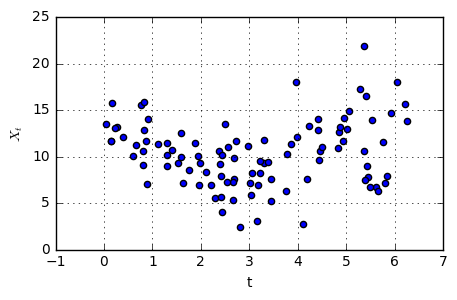

In [76]:
X = sum([x[1] for x in data])
T = sum([x[0] for x in data])
X2 = sum([x[1]**2 for x in data])
T2 = sum([x[0]**2 for x in data])
XT = sum([x[1]*x[0] for x in data])
N = len(data)


# Plotting of data points

X = [x[0] for x in data]
T = [x[1] for x in data]
fig, ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(T,X)
ax.set_xlabel('t')
ax.set_ylabel('$X_t$')
ax.grid()



In [88]:
def lnpred(data, a):
    linear = a[0] + a[1]*np.sin(a[2]*data[0]) + a[3]*np.cos(a[4]*data[0])
    return linear
    
def lnprob(a,data):
    A2 = np.sum([e**2 for e in a])
    return -0.5*A2 + np.sum([lnpred(e,a) for e in data])
     

In [89]:
def lnposterior(data):
    return lnpred(data,a) + lnprob(a,data)

In [90]:
blah = lambda a: lnprob(a, data)

In [91]:
import emcee
nwalkers = 40
ndim = 5
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, blah)
pos, prob, state = sampler.run_mcmc(p0, 1000)
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 100000)
samples = sampler.flatchain

In [83]:
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])

omega0 = float(MonteCarlo(lambda x: x[0], samples))
omega1 = float(MonteCarlo(lambda x: x[1], samples))
omega2 = float(MonteCarlo(lambda x: x[2], samples))
omega3 = float(MonteCarlo(lambda x: x[3], samples))
lam = MonteCarlo(lambda x: x[4], samples)


print ('o0 = {0},\no1 = {1},\no2 = {2},\no3 = {3}, \1 = {4}'.format(omega0, omega1, omega2, omega3, lam))

o0 = 100.304343959,
o1 = 44.2606531299,
o2 = 0.925622256968,
o3 = -13.5843995878,  = -0.522322644177


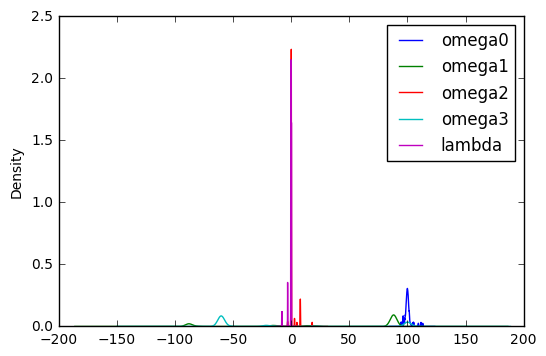

In [84]:
import pandas as pd
data = pd.DataFrame(samples, columns =['omega0', 'omega1', 'omega2', 'omega3', 'lambda'])
data.plot(kind = 'density')

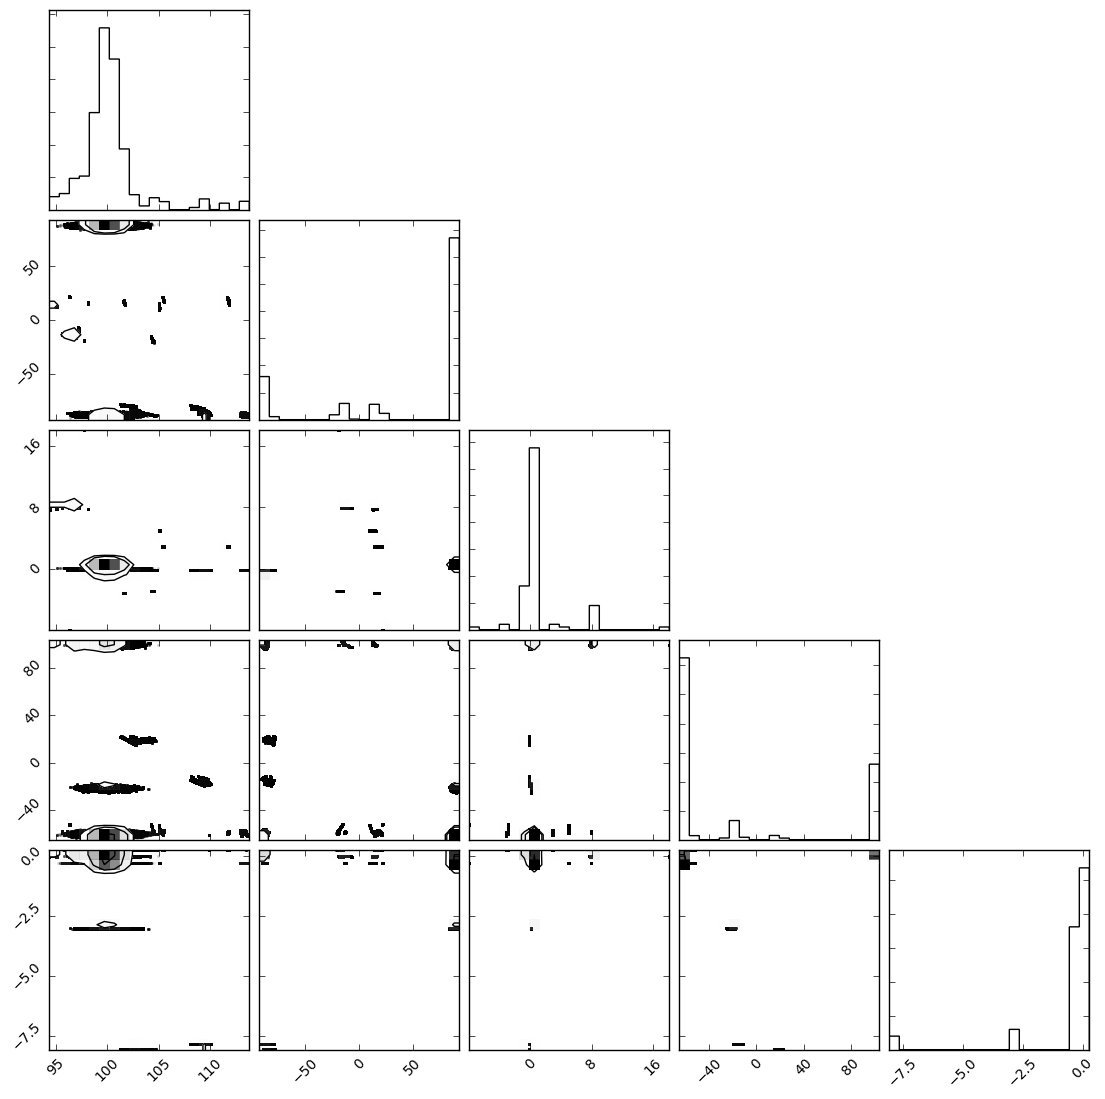

In [85]:
import corner
fig = corner.corner(samples)